In [1]:
using QuadGK
using Polynomials
using Plots
using DataFrames

┌ Info: Recompiling stale cache file /Users/kuba/.julia/compiled/v1.0/DataFrames/AR9oZ.ji for DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1187


In [2]:
# funkcja obliczająca odcięte punktów Gaussa oraz ich współczynniki 
(xp,a)=gauss(Float64,7)

([-0.949108, -0.741531, -0.405845, 0.0, 0.405845, 0.741531, 0.949108], [0.129485, 0.279705, 0.38183, 0.417959, 0.38183, 0.279705, 0.129485])

In [3]:
f(x)=x^2
sum(a .* f.(xp))

0.6666666666666669

## Legendre

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{i}(x)=\frac{2i-1}{i}x*P_{i-1}(x)-\frac{i-1}{i}*P_{i-2}(x)$



In [4]:
function legendre(n, sym::Symbol=:x)
    x = Poly([0//1,1//1],sym)
    p0 = Poly([1//1], sym)
    p1 = x
    if n==0
        return p0
    elseif n==1
        return p1
    end

    for i = 2:n
        p2 = ( (2i-1)*x*p1 - (i-1)*p0 ) / i
        p1, p0 = p2, p1
    end

    return p1
end

legendre (generic function with 2 methods)

In [5]:
legendre(2)

Poly(-1//2 + 3//2*x^2)

In [6]:
legendre(3)

Poly(-3//2*x + 5//2*x^3)

In [7]:
legendre(4)

Poly(3//8 - 15//4*x^2 + 35//8*x^4)

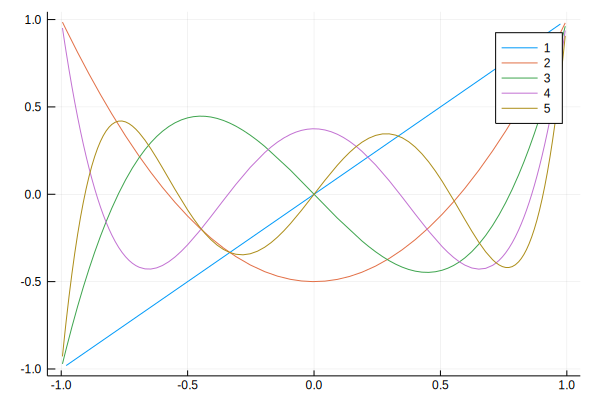

In [8]:
plot(x->legendre(1)(x),-1,1,label="1")
plot!(x->legendre(2)(x),-1,1,label="2")
plot!(x->legendre(3)(x),-1,1,label="3")
plot!(x->legendre(4)(x),-1,1,label="4")
plot!(x->legendre(5)(x),-1,1,label="5")

In [9]:
roots(legendre(2)), gauss(Float64,2)[1]

([-0.57735, 0.57735], [-0.57735, 0.57735])

In [10]:
roots(legendre(3)), gauss(Float64,3)[1]

([-0.774597, 0.774597, 0.0], [-0.774597, 0.0, 0.774597])

In [11]:
roots(legendre(4)), gauss(Float64,4)[1]

([-0.861136, 0.861136, -0.339981, 0.339981], [-0.861136, -0.339981, 0.339981, 0.861136])

In [12]:
function intGauss(k, f)
    (x,w) = gauss(Float64,k)
    sum(w .* f.(x))   
end

intGauss (generic function with 1 method)

In [13]:
f1 = x -> x*x
intGauss(2,f1), quadgk(f1,-1,1)[1]

(0.6666666666666667, 0.6666666666666667)

In [14]:
f3 = x -> cos.(x)
intGauss(4,f3), quadgk(f3,-1,1)[1]

(1.6829416886959732, 1.6829419696157932)

In [15]:
data = DataFrame(k = Int64[], gauss = Float64[], quadqk = Float64[], isEqual = Bool[])
d = Int64[]
for i in 1:1:20
    append!(d,[Int64(i)])
    p = poly(d)
    for k in 1:1:3
        xg = intGauss(k,p)
        xq = quadgk(p,-1,1)[1]
        push!(data,[k, xg, xq, (xg≈xq)])     
    end
end 

In [16]:
data

,k,gauss,quadqk,isEqual
,Int64,Float64,Float64,Bool
1,1,-2.0,-2.0,true
2,2,-2.0,-2.0,true
3,3,-2.0,-2.0,true
4,1,4.0,4.66667,false
5,2,4.66667,4.66667,true
6,3,4.66667,4.66667,true
7,1,-12.0,-16.0,false
8,2,-16.0,-16.0,true
9,3,-16.0,-16.0,true


# zadanie 3
$\int_{a}^{b} f(x) dx$

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $

$dx =\frac{b-a}{2} dz $

In [17]:
function integralFun(f, a, b)
    fz(x) = f(((b+a)/2)+((b-a)/2)*x)
    return((b-a)/2*intGauss(5,fz))
end

integralFun (generic function with 1 method)

In [18]:
data1 = DataFrame( a = Int64[], b = Int64[], integral = Float64[], quadqk = Float64[], isEqual = Bool[])
d = Int64[]
a=1
b=5
for i in 1:1:20
    append!(d,[Int64(i)])
    p = poly(d)
    xg = integralFun(p,a,b)
    xq = quadgk(p,a,b)[1]
    push!(data1,[a, b, xg, xq, (xg≈xq)])
    a = a-1
    b = b-1
end 

In [19]:
data1

,a,b,integral,quadqk,isEqual
,Int64,Int64,Float64,Float64,Bool
1,1,5,8.0,8.0,true
2,0,4,5.33333,5.33333,true
3,-1,3,-16.0,-16.0,true
4,-2,2,295.467,295.467,true
5,-3,1,-6229.33,-6229.33,true
6,-4,0,1.51194e5,1.51194e5,true
7,-5,-1,-4.20015e6,-4.20015e6,true
8,-6,-2,1.3213e8,1.3213e8,true
9,-7,-3,-4.65539e9,-4.65539e9,true


# Zadanie 4

rozkładu normalny Gaussa 

$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

In [20]:
rnG = x -> 1/√(2*pi)*exp.(-x^2/2)

#18 (generic function with 1 method)

In [21]:
quadgk(rnG,-Inf,+Inf)[1], quadgk(rnG,-5,+5)[1]

(1.0000000000032583, 0.9999994266968563)

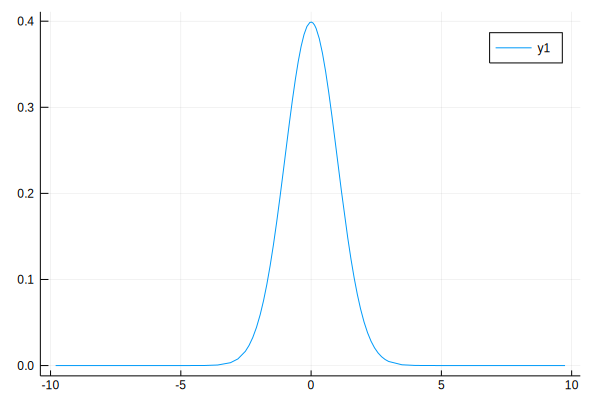

In [22]:
plot(x->rnG(x),-10,10)

# Zadanie 5

In [23]:
function recInt(f, a, b, n)
    res = 0
    prev = a
    samp = (b-a)/n
    for i in a+samp:samp:b
        res += (f(i)+f(prev))/2 * samp
        prev = i
    end   
    return res
end

recInt (generic function with 1 method)

In [24]:
a=-10
b=15
fun1 = Poly([1,2,3,4,5,6,7])
comp = DataFrame(it=Int64[], rectangleRule = Float64[], quadgk = Float64[], isEqual = Bool[], diff = Float64[])
for i in 1:1:100
    xr = recInt(fun1,a,b,i)
    xq = quadgk(fun1,a,b)[1]
    push!(comp,[i,xr, xq, xr ≈ xq, xr-xq])
end

In [25]:
comp

,it,rectangleRule,quadgk,isEqual,diff
,Int64,Float64,Float64,Bool,Float64
1,1,1.13755e9,1.92155e8,false,9.45398e8
2,2,5.68809e8,1.92155e8,false,3.76654e8
3,3,2.97968e7,1.92155e8,false,-1.62358e8
4,4,3.06263e8,1.92155e8,false,1.14108e8
5,5,2.66908e8,1.92155e8,false,7.47534e7
6,6,2.44729e8,1.92155e8,false,5.25745e7
7,7,2.31077e8,1.92155e8,false,3.89225e7
8,8,2.22103e8,1.92155e8,false,2.99483e7
9,9,2.15898e8,1.92155e8,false,2.37435e7


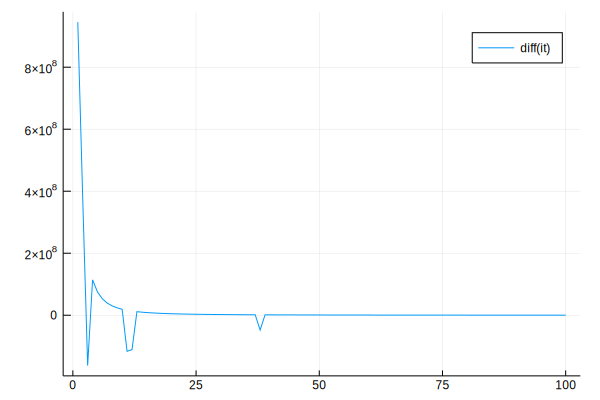

In [26]:
plot(comp[:it], comp[:diff], label="diff(it)")

In [27]:
a=-10
b=15
fun2 = Poly([1,2,3,4,5,6,7,8,9,10,11,12,13,14,16])
compa = DataFrame(it=Int64[], rectangleRule = Float64[], quadgk = Float64[], isEqual = Bool[], diff = Float64[])
for i in 1:1:100
    xr = recInt(fun2,a,b,i)
    xq = quadgk(fun2,a,b)[1]
    push!(compa,[i,xr, xq, xr ≈ xq, xr-xq])
end

In [28]:
compa

,it,rectangleRule,quadgk,isEqual,diff
,Int64,Float64,Float64,Bool,Float64
1,1,6.22003e18,4.99341e17,false,5.72069e18
2,2,3.11002e18,4.99341e17,false,2.61068e18
3,3,6.15924e15,4.99341e17,false,-4.93181e17
4,4,1.55672e18,4.99341e17,false,1.05738e18
5,5,1.25278e18,4.99341e17,false,7.53439e17
6,6,1.05895e18,4.99341e17,false,5.59612e17
7,7,9.2895e17,4.99341e17,false,4.29609e17
8,8,8.38261e17,4.99341e17,false,3.3892e17
9,9,7.72868e17,4.99341e17,false,2.73528e17


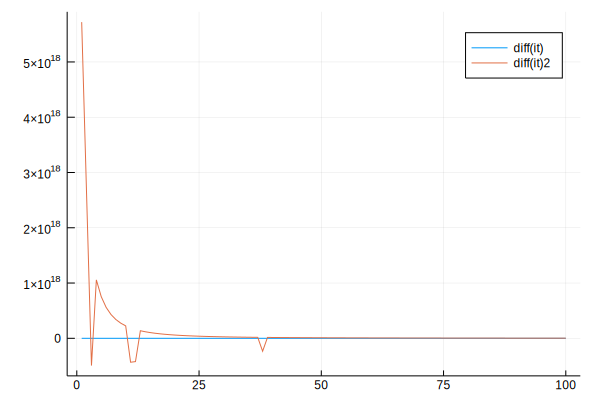

In [29]:
plot!(compa[:it], compa[:diff], label="diff(it)2")